# Quality

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os

In [2]:
def create_scatter_with_lines(df: pd.DataFrame, x_col: str, y_col: str, threshold_x: float = None, threshold_y: float = None, title : str = "Scatter-Plot",):
    """
    Erstelle ein Scatter-Plot aus dem gegebenen DataFrame und visualisiere Schwellenlinien für x- und y-Achsen
    mit Line2D.

    Parameter:
    df (pd.DataFrame): Das DataFrame mit den Daten.
    x_col (str): Der Name der Spalte für die x-Achse.
    y_col (str): Der Name der Spalte für die y-Achse.
    threshold_x (float): Der Schwellenwert für die x-Achse.
    threshold_y (float): Der Schwellenwert für die y-Achse.

    Rückgabe:
    None: Zeigt das Scatter-Plot mit Schwellenlinien an.
    """
    # Erstelle das Figure und die Achse
    fig, ax = plt.subplots()

    # Erstelle das Scatter-Plot mit seaborn
    sns.scatterplot(data=df, x=x_col, y=y_col, color='blue', alpha=0.5, ax=ax)

    if threshold_x != None:
        # Füge die vertikale Linie hinzu (Schwellenwert für x-Achse)
        ax.add_line(Line2D([threshold_x, threshold_x], ax.get_ylim(), color='red', linestyle='--', label=f'{x_col} Schwellenwert = {threshold_x}'))
    
    if threshold_y != None:
        # Füge die horizontale Linie hinzu (Schwellenwert für y-Achse)
        ax.add_line(Line2D(ax.get_xlim(), [threshold_y, threshold_y], color='green', linestyle='--', label=f'{y_col} Schwellenwert = {threshold_y}'))

    # Achsenbeschriftungen
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

    # Titel des Plots
    ax.set_title(title)

    # Zeige die Legende an
    ax.legend()

    # Zeige den Plot an
    plt.show()

def get_identifiers(dir_path : str):
    res = []
    for file in os.listdir(dir_path):
        res.append(str(file.split(".")[0]+"."+file.split(".")[1]))
    return res

In [3]:
df = pd.read_csv("quality_report.tsv", sep="\t")
df["Name"] = df["Name"].astype(str)
df.head()

,Name,Completeness,Contamination,Completeness_Model_Used,Translation_Table_Used,Coding_Density,Contig_N50,Average_Gene_Length,Genome_Size,GC_Content,Total_Coding_Sequences,Total_Contigs,Max_Contig_Length,Additional_Notes
0,111955.6,99.92,0.10,Neural Network (Specific Model),11,0.865,67198,260.086459,2509444,0.32,2799,62,357777,NaN
1,111955.9,99.98,0.55,Neural Network (Specific Model),11,0.856,122549,255.546543,2675466,0.33,3008,42,449867,NaN
2,1132497.5,99.95,0.58,Neural Network (Specific Model),11,0.878,2645252,258.805380,2645252,0.35,3011,1,2645252,NaN
3,1132498.7,99.97,0.55,Neural Network (Specific Model),11,0.876,1691529,255.533247,2680814,0.35,3083,5,1691529,NaN
4,1132501.5,99.97,1.05,Neural Network (Specific Model),11,0.881,2601131,261.717399,2601131,0.35,2937,1,2601131,NaN


In [4]:
df["Name"]

0        111955.6
1        111955.9
2       1132497.5
3       1132498.7
4       1132501.5
          ...    
270     2817952.4
271     2817952.5
272    2831947.12
273     2876573.7
274      43080.45
Name: Name, Length: 275, dtype: str

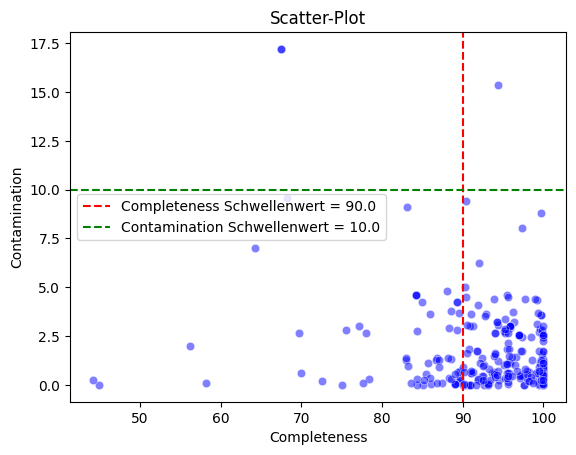

In [7]:
create_scatter_with_lines(df=df, x_col="Completeness", y_col="Contamination", threshold_x=90.0, threshold_y=10.0)

## Subsets

IDs: 10, df.shape: (10, 14)


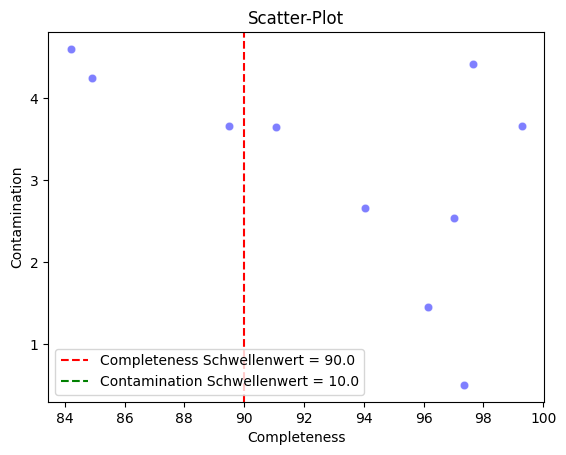

In [9]:
# subsets
asgard_subset = None
asgard_path = "2/ASGARD_genomes"
asgard_ids = get_identifiers(asgard_path)
asgard_df = df[df["Name"].isin(asgard_ids)]
print(f"IDs: {len(asgard_ids)}, df.shape: {asgard_df.shape}")
create_scatter_with_lines(df=asgard_df, x_col="Completeness", y_col="Contamination", threshold_x=90.0, threshold_y=10.0)

IDs: 10, df.shape: (10, 14)


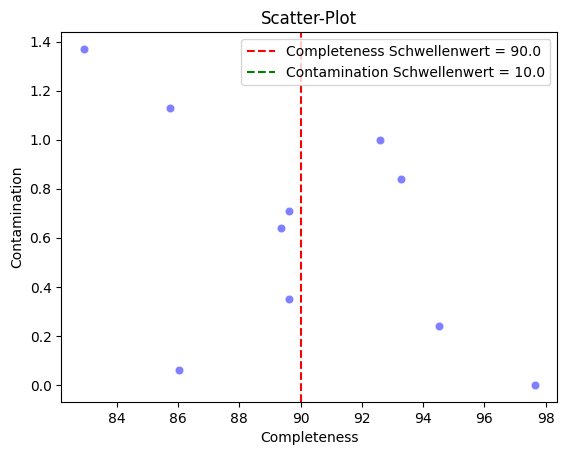

In [10]:
dpann_subset = None
dpann_path = "2/DPANN_genomes"
dpann_ids = get_identifiers(dpann_path)
dpann_df = df[df["Name"].isin(dpann_ids)]
print(f"IDs: {len(dpann_ids)}, df.shape: {dpann_df.shape}")
create_scatter_with_lines(df=dpann_df, x_col="Completeness", y_col="Contamination", threshold_x=90.0, threshold_y=10.0)

IDs: 10, df.shape: (10, 14)


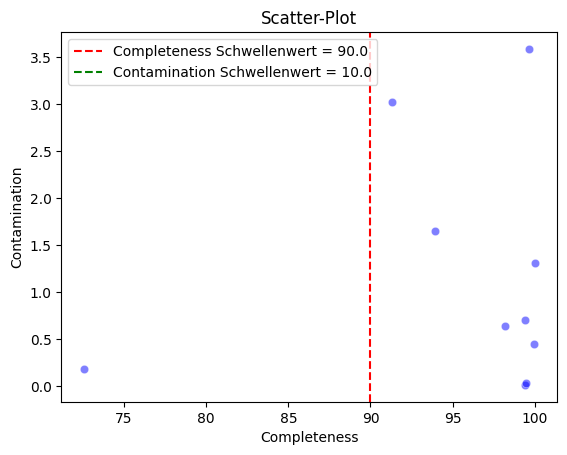

In [11]:
eury_subset = None
eury_path = "2/EURY_genomes"
eury_ids = get_identifiers(eury_path)
eury_df = df[df["Name"].isin(eury_ids)]
print(f"IDs: {len(eury_ids)}, df.shape: {eury_df.shape}")
create_scatter_with_lines(df=eury_df, x_col="Completeness", y_col="Contamination", threshold_x=90.0, threshold_y=10.0)

IDs: 10, df.shape: (10, 14)


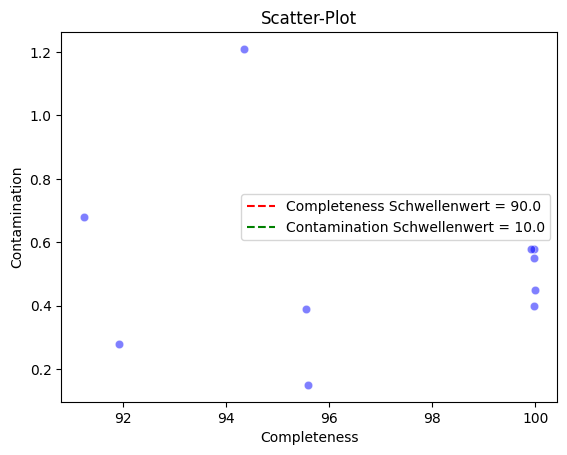

In [12]:
tack_subset = None
tack_path = "2/TACK_genomes"
tack_ids = get_identifiers(tack_path)
tack_df = df[df["Name"].isin(tack_ids)]
print(f"IDs: {len(tack_ids)}, df.shape: {tack_df.shape}")
create_scatter_with_lines(df=tack_df, x_col="Completeness", y_col="Contamination", threshold_x=90.0, threshold_y=10.0)

### Summary